In [1]:
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import models
from keras.utils.vis_utils import plot_model

In [2]:
cratched_model = Sequential([
    # Input(shape=(256, 256, 3)),
    layers.Conv2D(filters=112, kernel_size=(5,5),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=80, kernel_size=(3,3), strides=(1,1),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),  activation='relu'),

    # layers.Flatten(),
    # layers.Dense(units=768, activation='relu'),
    # layers.Dropout(0.5),
    # layers.Dense(units=4, activation='softmax')

])
# cratched_model.summary()

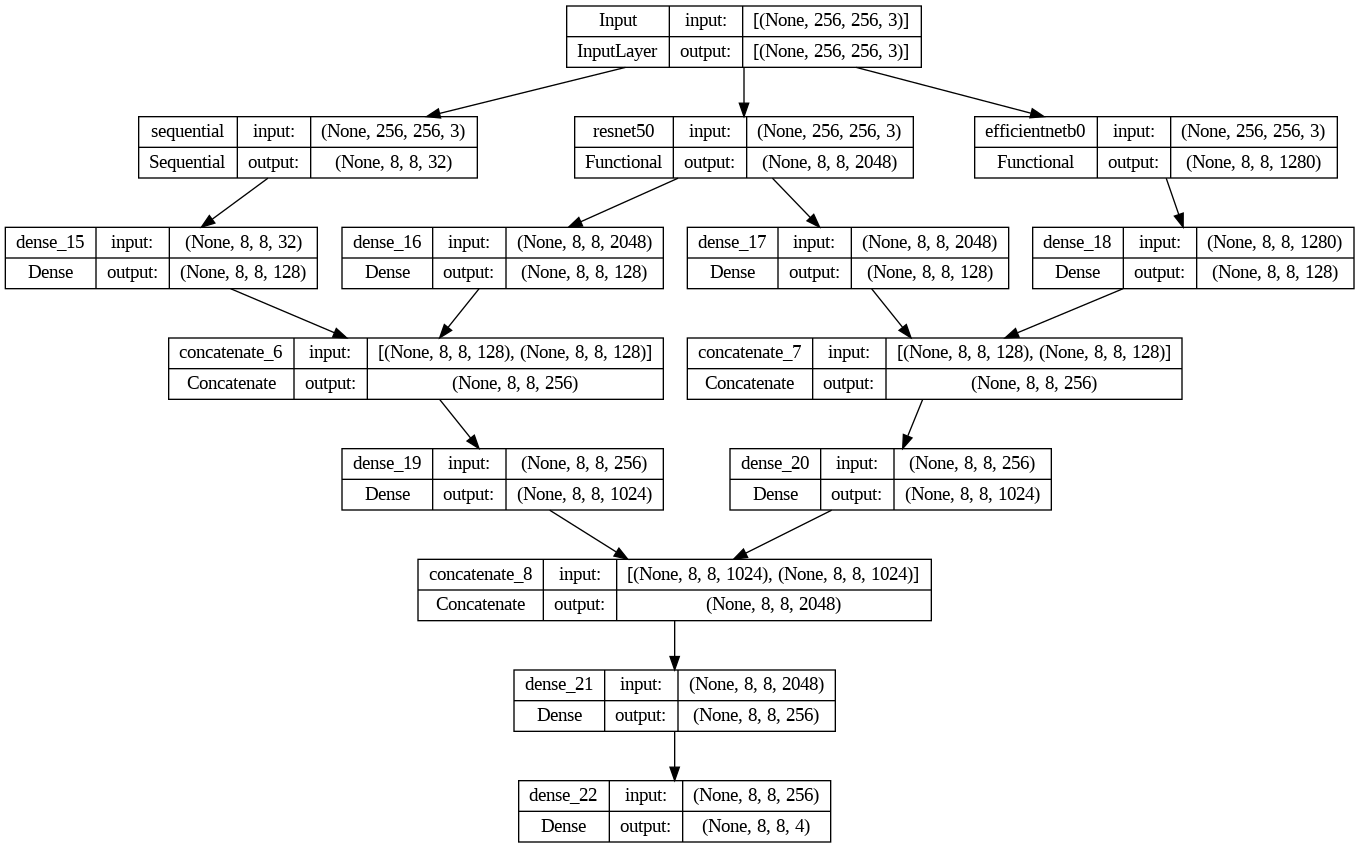

In [6]:
img_size = 256
ip_img = Input(shape=(img_size,img_size,3), name="Input")

#Model A
model1 = cratched_model(ip_img)
dense1 = Dense(128, activation='relu')(model1)


#Model B
ResNet50_B = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
# for layer in ResNet50_B.layers:
#     layer.name = layer.name + str('_B')

model2 = ResNet50_B(ip_img)
dense2 = Dense(128, activation='relu')(model2)

#Model C
ResNet50_C = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
# for layer in ResNet50_C.layers:
#     layer.name = layer.name + str('_C')

model3 = ResNet50_B(ip_img)
dense3 = Dense(128, activation='relu')(model3)

#Model B
model4 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))(ip_img)
dense4 = Dense(128, activation='relu')(model4)


#Merging model 1 and 2
merge1 = concatenate([dense1, dense2])  # Merge dense1 and dense2
dense5 = Dense(1024, activation='relu')(merge1)

#Merging model 3 and 4
merge2 = concatenate([dense3, dense4])  # Merge dense3 and dense4
dense6 = Dense(1024, activation='relu')(merge2)

#Merging merge 1 and 2
merge3 = concatenate([dense5, dense6])  # Merge dense3 and dense4
dropout_layer = Dropout(0.5)(merge2)
dense7 = Dense(256, activation='relu')(merge3)


output = Dense(4, activation='softmax')(dense7)

# Create the model
model = Model(inputs=ip_img, outputs=output)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)